In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('log_0819_train_1.csv')
df = df.drop('Unnamed: 0',axis=1)
epsilon_ = df['Epsilon'] < 1
df_ = df[epsilon_].reset_index(drop=True,inplace=False)

In [3]:
df_

,Episode,Time,Final step,Score,Epsilon,Min_loss,avg_loss
0,0,0.405,81,-1958,0.999,NaN,0.011029
1,1,0.405,81,-2020,0.999,NaN,0.010847
2,2,0.405,81,-2002,0.999,NaN,0.009964
3,3,0.405,81,-2229,0.999,NaN,0.011300
4,4,0.405,81,-1521,0.999,NaN,0.010573
...,...,...,...,...,...,...,...
995,995,0.405,81,443,0.010,NaN,0.000017
996,996,0.405,81,443,0.010,NaN,0.000016
997,997,0.405,81,443,0.010,NaN,0.000017
998,998,0.405,81,-370,0.010,NaN,0.000027


In [4]:
x=range(int(len(df_['Episode'])))
y=df_['Epsilon']
y2=df_['Score']
y3=df_['avg_loss']

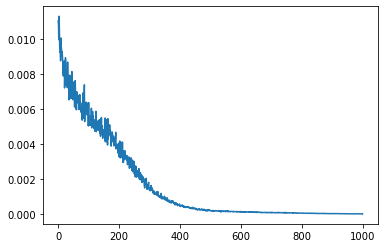

In [31]:
plt.subplot(111)
plt.plot(x,y3)

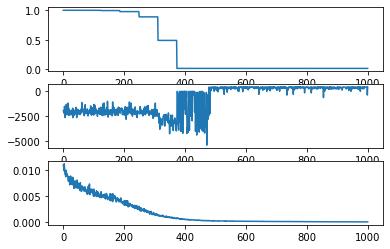

In [15]:
plt.subplot(111)
plt.plot(x,y)
plt.subplot(312)
plt.plot(x,y2)
plt.subplot(313)
plt.plot(x,y3)
plt.show()

In [39]:
#!/usr/bin/env python
# coding: utf-8

# In[10]:


import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import *
import numpy as np

class DQN: 
    def __init__(self,queue,cycle): 
        self.input = queue #agent는 queue 1개를 담당하지만 모든 queue의 state를 고려, 해당 큐에 몇 개의 flow가 대기중인지? or 몇 byte?
        self.output = 2**cycle #available action, 2^몇 개의 slot을 한 사이클로 정할것인지(cycle)
        self.learning_rate = 0.0001
        self.loss_history = []
        self.model = self.create_model() #현재 state에 대한 model
        self.target_model = self.create_model() #next state에 대한 model

    # create the neural network to train the q function 
    def create_model(self): 
        model = Sequential()
        model.add(Dense(24, input_dim= self.input, activation= 'relu')) 
        model.add(Dense(48, activation= 'relu'))
        model.add(Dense(24, activation= 'relu'))
        model.add(Dense(self.output)) #allowed action 
        model.compile(loss= 'mean_squared_error', optimizer= Adam(lr= self.learning_rate)) #optimizer의 learning rate 주의
        return model 
    
    def train(self, x, y, sample_weight=None, epochs=1, verbose=0):  # x is the input to the network and y is the output
        loss=[]
        history=self.model.fit(x, y, batch_size=len(x), sample_weight=sample_weight, epochs=epochs, verbose=verbose)
        loss.append(history.history['loss'][0]) # loss 기록
        return min(loss)
        
    def test(self,weight_file):
        self.model.load_weights(weight_file)
    
    def predict_one(self, state, target=False):
        return self.predict(np.array(state).reshape(1,self.input), target=target).flatten()

    def predict(self, state, target=False):
        if target:  # get prediction from target network
            return self.target_model.predict(state)
        else:  # get prediction from local network
            return self.model.predict(state)
    
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    # save our model 
    def save_model(self, filename):
        self.model.save(filename)



In [25]:
from tensorflow import keras

cc = keras.models.load_model("agent[1]1.2128006346756592e-05.h5")
ad = keras.models.load_model("agent[2]1.2128006346756592e-05.h5")
vd = keras.models.load_model("agent[3]1.2128006346756592e-05.h5")
be = keras.models.load_model("agent[4]1.2128006346756592e-05.h5")

In [28]:
#from tensorflow.keras.utils.vis_utils import plot_model

cc.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                6

In [68]:
state=np.array([0,0,0,100]).reshape(-1,4)

In [69]:
a = format(np.argmax(ag1_be.predict(state)),'0'+str(10)+'b')
b = format(np.argmax(ag2_cc.predict(state)),'0'+str(10)+'b')
c = format(np.argmax(ag3_vd.predict(state)),'0'+str(10)+'b')
d = format(np.argmax(ag4_ad.predict(state)),'0'+str(10)+'b')


In [70]:
print (a  , b  , c  , d )

0100000001 1111101011 1111011001 1100011100


In [34]:
sim = pd.read_csv('switchlog0818_generated.csv')
sim = sim.drop('Unnamed: 0',axis=1)
# epsilon_ = df['Epsilon'] < 1
# sim_ = df[epsilon_].reset_index(drop=True,inplace=False)

In [41]:
generated_time=list(sim['time'])

In [42]:
generated_time=list(map(float,generated_time))

In [37]:
A=sim.loc[:,['Unnamed: 6']].values.tolist()
A[3]

['Epoch Time: 1629347652.299276543 seconds']

In [38]:
A_=list(map(str,A))
A_[3]

"['Epoch Time: 1629347652.299276543 seconds']"

In [39]:
B = [float(a[14:33]) for a in A_]
B

[1629347652.2979894,
 1629347652.2990386,
 1629347652.2982826,
 1629347652.2992766,
 1629347652.2985742,
 1629347652.2995045,
 1629347652.3041015,
 1629347652.304573,
 1629347652.3043237,
 1629347652.304808,
 1629347652.3072484,
 1629347652.3075056,
 1629347652.3101048,
 1629347652.3103294,
 1629347652.3161356,
 1629347652.316376,
 1629347652.317845,
 1629347652.3205283,
 1629347652.321827,
 1629347652.3220592,
 1629347652.3298326,
 1629347652.3301058,
 1629347652.3303616,
 1629347652.3376918,
 1629347652.3380063,
 1629347652.3382516,
 1629347652.3385425,
 1629347652.338776,
 1629347652.3390205,
 1629347652.3427012,
 1629347652.3429577,
 1629347652.3432088,
 1629347652.3503556,
 1629347652.350744,
 1629347652.3628292,
 1629347652.363139,
 1629347652.3666794,
 1629347652.367025,
 1629347652.375673,
 1629347652.375996,
 1629347652.3875723,
 1629347652.3879008,
 1629347652.3921392,
 1629347652.393764,
 1629347652.3997362,
 1629347652.4016302,
 1629347652.4069326,
 1629347652.4156306,
 162

In [43]:
c=[B[i]-generated_time[i] for i in range(len(B))]

In [44]:
sim.loc[:,'delay']=c

In [45]:
sim

,switch,class,number,time,queue,Unnamed: 6,delay
0,1,1,1,1.629348e+09,x,Epoch Time: 1629347652.297989364 seconds,0.009559
1,2,1,1,1.629348e+09,x,Epoch Time: 1629347652.299038561 seconds,0.006399
2,1,2,1,1.629348e+09,x,Epoch Time: 1629347652.298282571 seconds,0.004663
3,2,2,1,1.629348e+09,x,Epoch Time: 1629347652.299276543 seconds,0.004616
4,1,3,1,1.629348e+09,x,Epoch Time: 1629347652.298574273 seconds,0.002954
5,2,3,1,1.629348e+09,x,Epoch Time: 1629347652.299504492 seconds,0.002894
6,1,2,2,1.629348e+09,x,Epoch Time: 1629347652.304101529 seconds,0.004231
7,2,2,2,1.629348e+09,x,Epoch Time: 1629347652.304573058 seconds,0.003683
8,1,1,2,1.629348e+09,x,Epoch Time: 1629347652.304323633 seconds,0.002414
9,2,1,2,1.629348e+09,x,Epoch Time: 1629347652.304807973 seconds,0.001908


In [46]:
one = sim['class']==1
one = sim[one]
two = sim['class'] ==2
two = sim[two]
th = sim['class'] ==3
th = sim[th]

In [47]:
one

,switch,class,number,time,queue,Unnamed: 6,delay
0,1,1,1,1.629348e+09,x,Epoch Time: 1629347652.297989364 seconds,0.009559
1,2,1,1,1.629348e+09,x,Epoch Time: 1629347652.299038561 seconds,0.006399
8,1,1,2,1.629348e+09,x,Epoch Time: 1629347652.304323633 seconds,0.002414
9,2,1,2,1.629348e+09,x,Epoch Time: 1629347652.304807973 seconds,0.001908
13,1,1,3,1.629348e+09,x,Epoch Time: 1629347652.310329527 seconds,0.001299
15,2,1,3,1.629348e+09,x,Epoch Time: 1629347652.316375861 seconds,0.004566
19,1,1,4,1.629348e+09,x,Epoch Time: 1629347652.322059223 seconds,0.002549
20,2,1,4,1.629348e+09,x,Epoch Time: 1629347652.329832587 seconds,0.009002
24,1,1,5,1.629348e+09,x,Epoch Time: 1629347652.338006233 seconds,0.005846
25,2,1,5,1.629348e+09,x,Epoch Time: 1629347652.338251645 seconds,0.005062


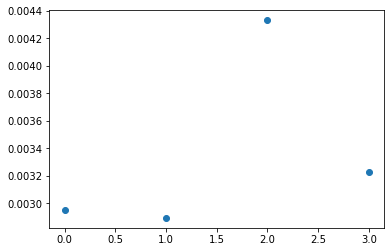

In [66]:
import matplotlib.pyplot as plt

import pandas as pd
from pandas import DataFrame
from pandas import Series

#plt.subplot(311)
# plt.ylim(-0.1,0.1)
#plt.scatter(range(len(one['delay'])),list(one['delay']))
#plt.subplot(312)
# plt.ylim(-0.1,0.1)
#plt.scatter(range(len(two['delay'])),list(two['delay']))
#plt.subplot(313)
# plt.ylim(-0.1,0.1)
plt.scatter(range(len(th['delay'])),list(th['delay']))
#plt.show()

In [59]:
list(th['delay'])

[0.002954244613647461,
 0.0028944015502929688,
 0.004332542419433594,
 0.003226041793823242]

In [64]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

ValueError: s must be a scalar, or the same size as x and y

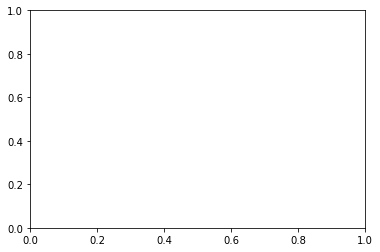

In [63]:

r1=range(len(one['delay']))
r2=range(len(two['delay']))
r3=range(len(th['delay']))
plt.scatter(r1,list(one['delay']),list(two['delay']),'r-')
#plt.scatter(r1,list(one['delay']),r2,list(two['delay']),r3,list(th['delay']))


In [160]:
#len(one['delay'])
a=range(40)
#list(one['delay'])
a[3]

3

In [180]:
import numpy as np
print(np.mean(one['delay']))
print(np.mean(two['delay']))
#print(np.mean(th['delay']))      

0.0036236226558685304
0.004235580563545227


In [181]:
np.mean(th['delay'])

0.0033518075942993164

In [184]:
np.mean(sim['delay'])

0.0037686904271443684